['금융', '금리', '대출', '채권', '상환', '지원', '국고', '연장', '카카오', '유예']
[58, 52, 51, 28, 24, 22, 22, 18, 18, 16]


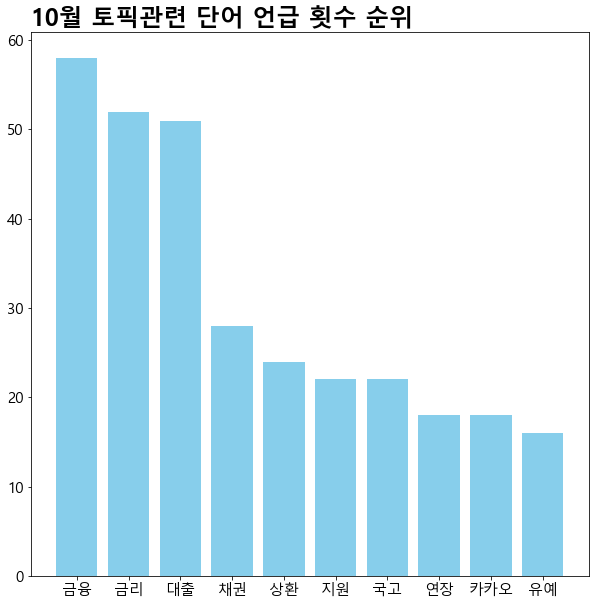

In [1]:
from selenium import webdriver
import schedule
import time
import datetime
import matplotlib.pyplot as plt 
from konlpy.tag import Kkma,Okt
from konlpy.utils import pprint
from collections import Counter
from matplotlib import font_manager, rc
import os

    
#현재 연, 월값 가져오기
cnt= str(datetime.datetime.now().year) +str(datetime.datetime.now().month)
month=str(datetime.datetime.now().month)
f = open("data/경제"+cnt+".txt","r") # 해당월에 해당되는 파일 오픈, 읽기전용

text=f.read()
        
#Okt 객체 생성
okt = Okt()
noun= okt. nouns(text)

#필요없는 단어 제거
pop_list=["연합뉴스","통해","위해","크게","여기","최근","내년","수준","현재","이번","대한","분야","재배포","전재","무단","금지","제공","배포"]
noun = [word for word in noun if len(word) >= 2 and word not in pop_list]
count= Counter(noun)

#명사 빈도 카운트 가장 많이 나온 단어 10개
noun_list=[]
for n,c in count.most_common(10):
    temp={'tag':n,'count':c}
    noun_list.append(temp)
#     print(temp)

#명사와 빈도수 따로 추출
word=[]
frequency=[]
for tag in noun_list:
    noun=tag['tag']
    count=tag['count']
    word.append(noun)
    frequency.append(count)
print(word)
print(frequency)


#화면에 그래프로 출력

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,10))

plt.rc('font', size=20) 
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}

#현재 작업 디렉토리
current_path = os.getcwd()
# print(current_path)
#변경 디렉토리
os.chdir('C:/Users/big1-01/Desktop/project/renewkdi2/renewKDI/src/main/resources/static/images/bigdata')
plt.title(month+'월 토픽관련 단어 언급 횟수 순위',fontdict=title_font, loc='left')
plt.bar(word, frequency, color='skyblue')

plt.savefig('경제빈도수그래프.png', bbox_inches='tight')

plt.show()


